# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

In Lousiana, the participation rate for the SAT is very low compared to the SAT in 2017 and 2018. Colorado was similiar although in 2018 the opposite occured.Data was analized to see why Colorado had an incraase in students taking the SAT. 

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
# Libraries that are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Importing CSV files and assiging them
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# Shows the rows 0-9 of SAT 2017 
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
# Shows the rows 0-9 of ACT 2017 
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Looking at the first 10 states in the lit for SAT and ACT scores in 2017, states have a higher percentage of one test over another test. For example, Connecticut has 100% for SAT participation but 31% for ACT participation. In addition, SAT does not have a National row as ACT does.

#### 4a. Does the data look complete? 

The data provided is not complete. The data will have to be cleaned and further research will have to be done. First, SAT 2017 will need to be researched to see if there is a natinal score, if this data is decided to be used from the ACT or if it is omitted. Second, the data needs to be cleaned. Maryland for math has 52 for SAT. This is an error as the score should 200-800 for each section.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

For the SAT, the range of scores can be 200-800 for Evidence-Based Reading and Writing and Math. For Total, the range is 400-1600.
For the ACT, the range of scores for English, Math, Reading,	Science, and Composite can be 1-36.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# Replace 2.3 with 23.0 
act_2017['Science'][21] = 23

/Users/brianjankowitz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# Replace 20.2x with 20.2
act_2017['Composite'][51] = 20.2

/Users/brianjankowitz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# Replace 52 with 520
sat_2017['Math'][20] = 520

/Users/brianjankowitz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [9]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

For SAT_2017, participaiton is stored as an object when it should be an integer or float.
For ACt _2017, particpiation and Composite are stored as an object when they should be an integer or float.
These will need to be changed in order to do calculations. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
# Mahdi, is this considered apply function?
# Function to remove percentage sign from Participation column in SAT_2017 and ACT_2017
def remove_percentage(df):
    df["Participation"] = df["Participation"].str.strip('%')
    df['Participation'] = df['Participation'].astype(int)
    df["Participation"] = df["Participation"]/100
    return df


- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
remove_percentage(sat_2017);

- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
remove_percentage(act_2017);

- Display the data types again to confirm they are correct.

In [13]:
# Remove data to clean data
act_2017 = act_2017.drop(act_2017.index[0])

In [14]:
# Converts the Composite Column in ACT-2017 from object to float
act_2017["Composite"]= act_2017["Composite"].astype(float)
act_2017["Participation"]= act_2017["Participation"].astype(float)
sat_2017["Participation"]= sat_2017["Participation"].astype(float)

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
# To rename columns in SAT_2017_new using camel case
sat_2017 = sat_2017.rename(columns={
                'State': 'state',
                'Participation': 'participation_sat_2017',
                'Evidence-Based Reading and Writing': 'evidence-based_reading_and_writing_sat_2017',
                'Math': 'math_sat_2017',
                'Total': 'total_sat_2017'
})

In [16]:
# To rename columns in ACT_2017_new using camel case
act_2017 = act_2017.rename(columns={
                'State': 'state',
                'Participation': 'participation_act_2017',
                'English': 'english_act_2017',
                'Math': 'math_act_2017',
                'Reading': 'reading_act_2017',
                'Science': 'science_act_2017',
                'Composite': 'composite_act_2017'
})

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state_sat_2017|object|SAT|Place of test
|participation_sat_2017|int|SAT|Percentage of people who took test
|evidence-based reading and writing_sat_2017|int|SAT|English score
|math_sat_2017|int|SAT|Math Score
|total_sat_2017|int|SAT|Total score
|state_act_2017|object|ACT|Place of test
|participation_act_2017|int|ACT|Percentage of people who took test
|english_act_2017|float|ACT|English score
|math_sat_2017|float|ACT|Math score
|reading_act_2017|float|ACT|Reading score
|science_act_2017|float|ACT|Science score


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

The row for National in act_2017 was removed above

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [17]:
# Combine sat_2017 and act_2017 and create new file
combined_2017 = pd.merge(
    left = sat_2017,
    right = act_2017,
    on = "state")

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [18]:
# Save new file
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [19]:
# Import SAT 2018 and ACT 2018 files
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [20]:
remove_percentage(sat_2018);
remove_percentage(act_2018);

In [21]:
# To rename columns in SAT_2018_new using camel case
sat_2018 = sat_2018.rename(columns={
                'State': 'state',
                'Participation': 'participation_sat_2018',
                'Evidence-Based Reading and Writing': 'evidence-based_reading_and_writing_sat_2018',
                'Math': 'math_sat_2018',
                'Total': 'total_sat_2018'
})



In [22]:
# To rename columns in ACT_2018_new using camel case8
act_2018 = act_2018.rename(columns={
                'State': 'state',
                'Participation': 'participation_act_2018',
                'English': 'english_act_2018',
                'Math': 'math_act_2018',
                'Reading': 'reading_act_2018',
                'Science': 'science_act_2018',
                'Composite': 'composite_act_2018'
})

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [23]:
act_2018.head()

,state,participation_act_2018,composite_act_2018
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [24]:
# Combine 2018 data
combined_2018 = pd.merge(
    left = sat_2018,
    right = act_2018,
    on = "state")

In [53]:
# Combine 2018 data
combined_2017_2018 = pd.merge(
    left = combined_2017,
    right = combined_2018,
    on = "state")

In [ ]:
# Save new file
combined_2017.to_csv('../data/combined_2017.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [26]:
combined_2017_2018.describe

<bound method NDFrame.describe of              state  participation_sat_2017  \
0          Alabama                    0.05   
1           Alaska                    0.38   
2          Arizona                    0.30   
3         Arkansas                    0.03   
4       California                    0.53   
5         Colorado                    0.11   
6      Connecticut                    1.00   
7         Delaware                    1.00   
8          Florida                    0.83   
9          Georgia                    0.61   
10          Hawaii                    0.55   
11           Idaho                    0.93   
12        Illinois                    0.09   
13         Indiana                    0.63   
14            Iowa                    0.02   
15          Kansas                    0.04   
16        Kentucky                    0.04   
17       Louisiana                    0.04   
18           Maine                    0.95   
19           Maine                    0.95   


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [27]:
# Function for deviation
import math
def stddev(num):
    y = []
    for z in combined_2017_2018[num]:
        y.append((z-np.mean(combined_2017_2018[num]))**2)
    return math.sqrt(np.mean(y))

In [28]:
combined_2017_2018.dtypes

state                                           object
participation_sat_2017                         float64
evidence-based_reading_and_writing_sat_2017      int64
math_sat_2017                                    int64
total_sat_2017                                   int64
participation_act_2017                         float64
english_act_2017                               float64
math_act_2017                                  float64
reading_act_2017                               float64
science_act_2017                               float64
composite_act_2017                             float64
participation_sat_2018                         float64
evidence-based_reading_and_writing_sat_2018      int64
math_sat_2018                                    int64
total_sat_2018                                   int64
participation_act_2018                         float64
composite_act_2018                             float64
dtype: object

In [29]:
# Show function works for one column
stddev('participation_act_2017')

0.3248306570911004

In [30]:
#To do Standard Deviation on all columns
#Does not run, commented out to avoid errors when run all
#df = combined_2017_2018.drop(columns = 'state')

#sd = {num: stddev(combined_2017_2018[num])}
#sd



- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Yes, the calculations are the same

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
        - Highest- Delaware, Michigan, Connecticut. 
        - Lowest- North Dakota, Mississippi, Iowa
    - 2018 SAT? 
        - Highest- Colorado, Connecticut, Delaware, Michigan, Idaho. 
        - Lowest- North Dakota, Wyoming, South Dakota, Nebraska. Wisconsin, Mississippi, Iowa
    - 2017 ACT? 
        - Highest- Alabama, Kentucky, Wisconsin, Utah, Tennessee (Other states have 100% participation rate as well). 
        - Lowest- Maine, Delaware, New Hampshire
    - 2018 ACT? 
        - Highest- Alabama, Kentucky, Wisconsin, Utah, Tennessee (Other states have 100% participation rate as well). 
        - Lowest- Maine, Rhode Island
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT? 
        - Highest- Minnesota, Wisconsin
        - Lowest- Delaware, Idaho
    - 2018 SAT? 
        - Highest- Minnesota, Wisconsin
        - Lowest- Delaware, Virginia
    - 2017 ACT? 
        - Highest- New Hampshire, Massachusetts
        - Lowest- Nevada, Mississippi
    - 2018 ACT? 
        - Highest- Connecticut,Massachusetts
        - Lowest- Nevada, South Carolina
- Do any states with 100% participation on a given test have a rate change year-to-year? 
    - Colorado, Idado, Maine, Michigan
- Do any states show have >50% participation on *both* tests either year?
    - For 2017,Florida, Georgia, Hawaii
    - For 2018,Florida, Georgia, Hawaii, North Carolina, South Carolina

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [31]:
# Simliar sates have the high/low score for preceeding years
# Why do Colorado's, Idado's, Maine's, and Michigan's' rates change?
# Why do some states have a average total/composoite low score for two preceeding years? Example Mississippi 

In [32]:
# Used for all participation rate questions
combined_2017_2018.sort_values(by=['total_sat_2018'], ascending=True)[0:10]

,state,participation_sat_2017,evidence-based_reading_and_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,evidence-based_reading_and_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
48,West Virginia,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,20.4,0.28,513,486,999,0.65,20.3
11,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
10,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3,0.04,480,530,1010,1.00,20.4
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.2
18,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0,0.97,513,505,1018,0.15,24.2
12,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,21.4,0.99,513,506,1019,0.43,23.9


In [33]:
# Higher than 50% participation in both tests for a single year
participation_total_2018 = combined_2017_2018[(combined_2017_2018['participation_sat_2018'] > 0.50) & (combined_2017_2018['participation_act_2018'] > 0.50)][0:10]
participation_total_2018

,state,participation_sat_2017,evidence-based_reading_and_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,evidence-based_reading_and_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
8,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
9,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.70,542,522,1064,0.53,21.4
10,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,19.0,0.56,480,530,1010,0.89,18.9
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1098,1.00,19.1
40,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,18.7,0.55,547,523,1070,1.00,18.3


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

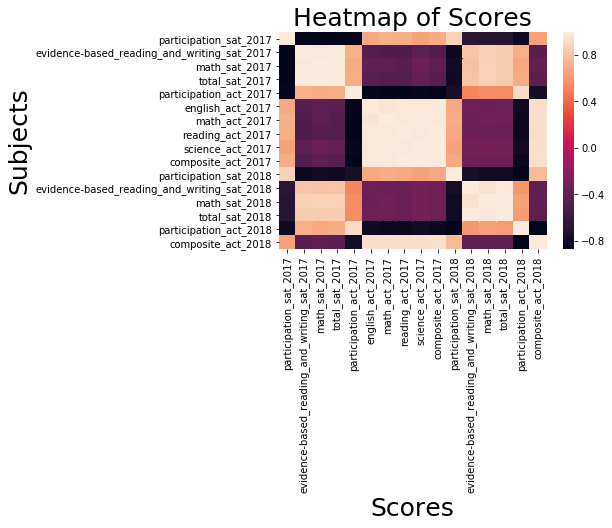

In [34]:
# Make heatmap
sns.heatmap(combined_2017_2018.corr())
plt.title("Heatmap of Scores", fontsize = 25)
plt.ylabel("Subjects", fontsize = 25)
plt.xlabel("Scores", fontsize = 25);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [35]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

In [36]:
combined_2017_2018.columns

Index(['state', 'participation_sat_2017',
       'evidence-based_reading_and_writing_sat_2017', 'math_sat_2017',
       'total_sat_2017', 'participation_act_2017', 'english_act_2017',
       'math_act_2017', 'reading_act_2017', 'science_act_2017',
       'composite_act_2017', 'participation_sat_2018',
       'evidence-based_reading_and_writing_sat_2018', 'math_sat_2018',
       'total_sat_2018', 'participation_act_2018', 'composite_act_2018'],
      dtype='object')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

<function matplotlib.pyplot.show>

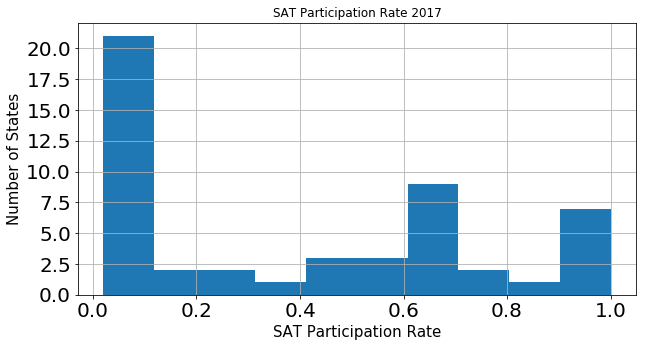

In [37]:
combined_2017_2018.hist(column='participation_sat_2017', xlabelsize=20, ylabelsize=20, figsize=(10,5)) 
plt.xlabel('SAT Participation Rate', fontsize=15)
plt.ylabel('Number of States', fontsize=15)
plt.title('SAT Participation Rate 2017')
plt.show

<function matplotlib.pyplot.show>

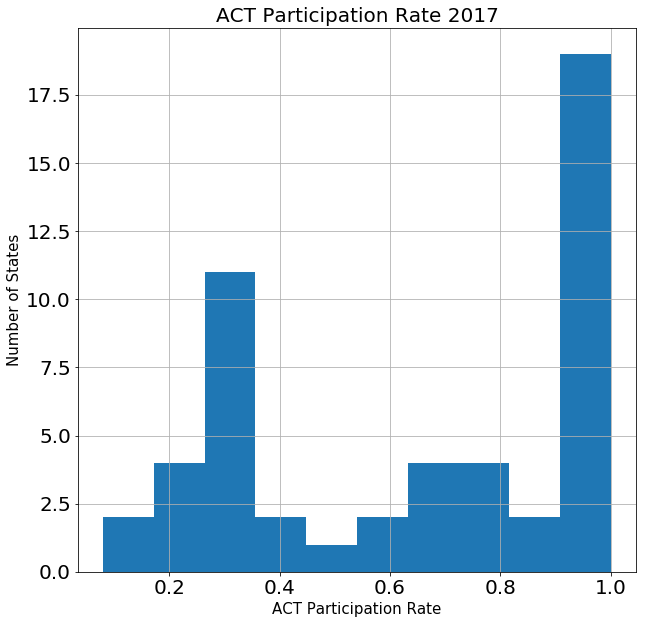

In [38]:
combined_2017_2018.hist(column='participation_act_2017', xlabelsize=20, ylabelsize=20, figsize=(10,10)) 
plt.xlabel('ACT Participation Rate', fontsize=15)
plt.ylabel('Number of States', fontsize=15)
plt.title('ACT Participation Rate 2017', fontsize=20)
plt.show

<function matplotlib.pyplot.show>

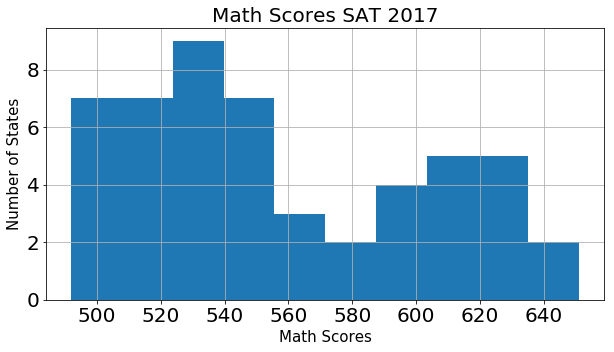

In [39]:
combined_2017_2018.hist(column='math_sat_2017', xlabelsize=20, ylabelsize=20, figsize=(10,5)) 
plt.xlabel('Math Scores', fontsize=15)
plt.ylabel('Number of States', fontsize=15)
plt.title('Math Scores SAT 2017', fontsize=20)
plt.show

<function matplotlib.pyplot.show>

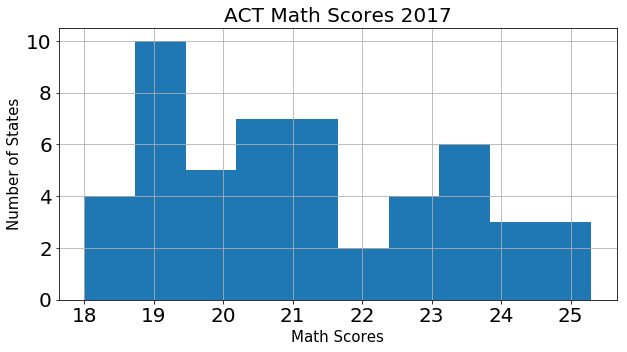

In [40]:
combined_2017_2018.hist(column='math_act_2017', xlabelsize=20, ylabelsize=20, figsize=(10,5)) 
plt.xlabel('Math Scores', fontsize=15)
plt.ylabel('Number of States', fontsize=15)
plt.title('ACT Math Scores 2017', fontsize=20)
plt.show

<function matplotlib.pyplot.show>

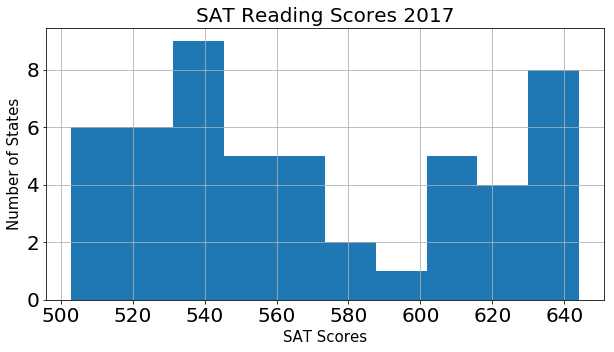

In [41]:
combined_2017_2018.hist(column='evidence-based_reading_and_writing_sat_2017', xlabelsize=20, ylabelsize=20, figsize=(10,5))
plt.xlabel('SAT Scores', fontsize=15)
plt.ylabel('Number of States', fontsize=15)
plt.title('SAT Reading Scores 2017', fontsize=20)
plt.show

<function matplotlib.pyplot.show>

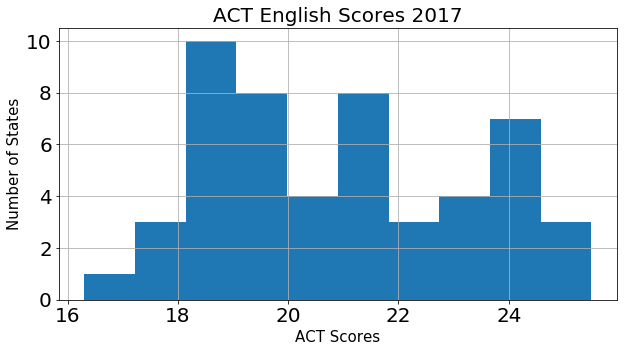

In [42]:
combined_2017_2018.hist(column='english_act_2017', xlabelsize=20, ylabelsize=20, figsize=(10,5))
plt.xlabel('ACT Scores', fontsize=15)
plt.ylabel('Number of States', fontsize=15)
plt.title('ACT English Scores 2017', fontsize=20)
plt.show

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


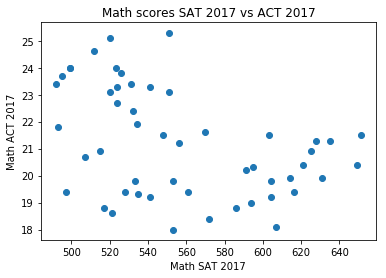

In [43]:
# Create scattter plot
# Made for math instead of Reading
# Shows how math scores for SAT compares to ACT
plt.scatter(combined_2017_2018.math_sat_2017, combined_2017_2018.math_act_2017)
plt.title("Math scores SAT 2017 vs ACT 2017")
plt.ylabel("Math ACT 2017")
plt.xlabel("Math SAT 2017");

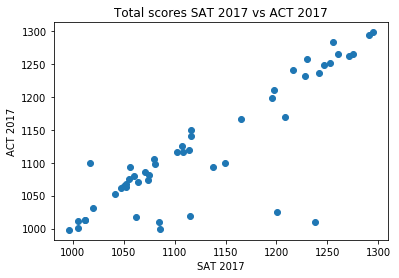

In [44]:
# Create scattter plot
# Shows how total/composite scores for SAT compares to ACT
plt.scatter(combined_2017_2018.total_sat_2017, combined_2017_2018.total_sat_2018)
plt.title("Total scores SAT 2017 vs ACT 2017")
plt.ylabel("ACT 2017")
plt.xlabel("SAT 2017");

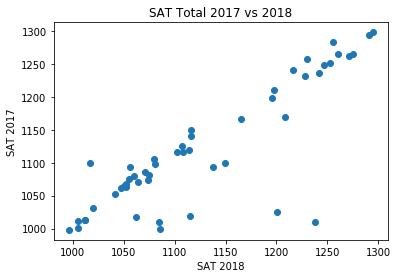

In [45]:
# Create scattter plot
# Shows how total SAT score comparison for 2017 and 2018
plt.scatter(combined_2017_2018.total_sat_2017, combined_2017_2018.total_sat_2018)
plt.title("SAT Total 2017 vs 2018")
plt.ylabel("SAT 2017")
plt.xlabel("SAT 2018");

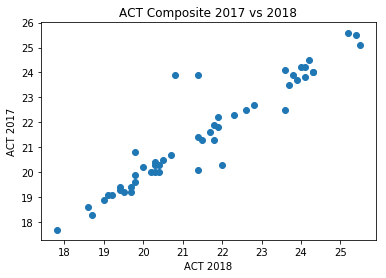

In [46]:
# Create scatter plot
# Shows how total ACT score comparison for 2017 and 2018
plt.scatter(combined_2017_2018.composite_act_2017, combined_2017_2018.composite_act_2018)
plt.title("ACT Composite 2017 vs 2018")
plt.ylabel("ACT 2017")
plt.xlabel("ACT 2018");

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

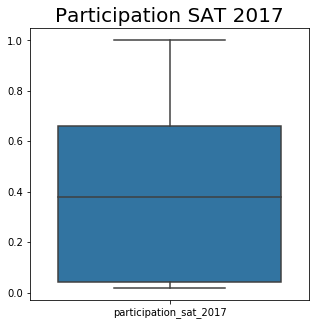

In [47]:
ax = plt.subplots(figsize=(5,5))
plt.title('Participation SAT 2017', fontsize=20)
sns.boxplot(data=combined_2017_2018[['participation_sat_2017']])

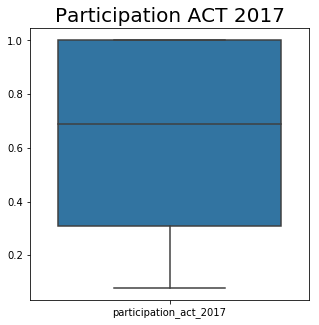

In [48]:
ax = plt.subplots(figsize=(5,5))
plt.title('Participation ACT 2017', fontsize=20)
sns.boxplot(data=combined_2017_2018[['participation_act_2017']])

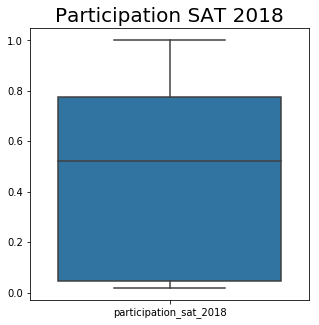

In [49]:
ax = plt.subplots(figsize=(5,5))
plt.title('Participation SAT 2018', fontsize=20)
sns.boxplot(data=combined_2017_2018[['participation_sat_2018']])

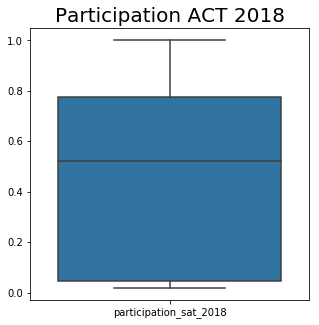

In [50]:
ax = plt.subplots(figsize=(5,5))
plt.title('Participation ACT 2018', fontsize=20)
sns.boxplot(data=combined_2017_2018[['participation_sat_2018']])

Text(0.5,1,'SAT Participation 2017')

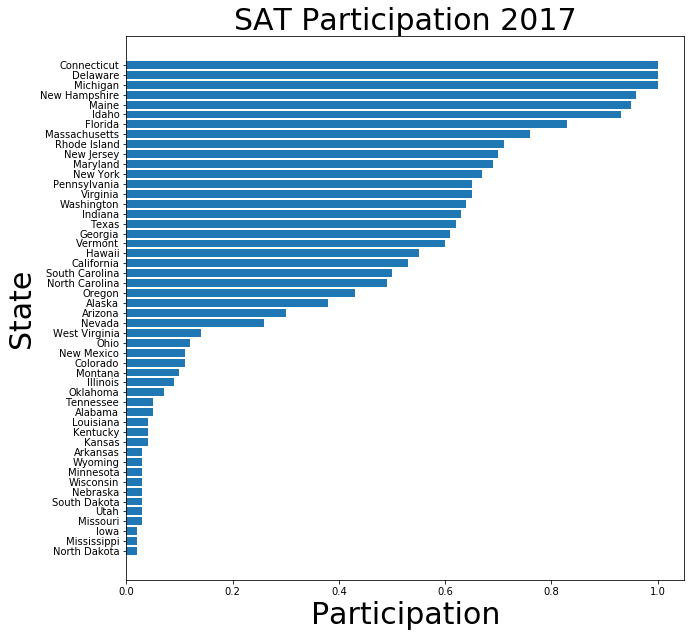

In [51]:
# Horizontal bar graph for presentation 
combined_2017_2018_organize = combined_2017_2018.sort_values('participation_sat_2017')
plt.figure(figsize=[10,10])
plt.barh(combined_2017_2018_organize['state'], combined_2017_2018_organize['participation_sat_2017'])
plt.xlabel('Participation', fontsize = 30) 
plt.ylabel('State', fontsize = 30) 

plt.title('SAT Participation 2017', fontsize = 30)




#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

- CT, LA, NJ
- High percentage taking ACT than SAT
- Why CT has more SAT takers than ACT (percentage wise) unlike LA opposite
- Why Lousiana has little participation in SAT

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

- The ACT tends to have more test takers in the central part of the United States unlike the SAT where it is very popular on the east and west coat. This could be due to smaller universities in 
the midwest than on the coasts. However, Lousiana has a lower 
percentage of students taking the SAT than ACT because 
the state uses the ACT for high school testing.

- College Board, the organization that adminsters the SAT, 
can talk with the Lousiana government to try and get them 
to change to the SAT. College Board can lobby and enter a 
bidding battle with the ACT.

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [52]:
# Code: